# SVM 커널 실습

In [1]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)


In [2]:
# Data
from sklearn.datasets import load_iris

iris = load_iris()

data = iris.data
target = iris.target

In [3]:
data = data[target !=0, :2]
target = target[target !=0]

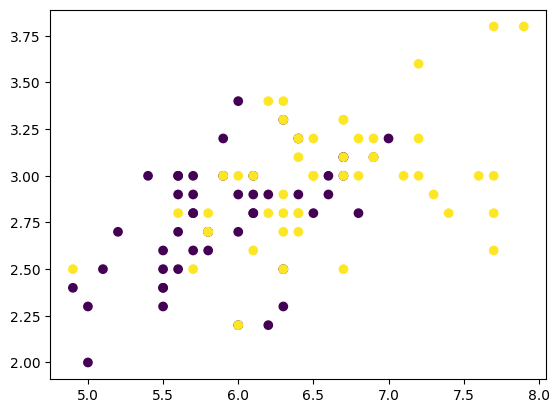

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=target)

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021
)

## Linear Kernel

In [6]:
from sklearn.svm import SVC

In [7]:
linear_svc = SVC(kernel="linear")

In [8]:
linear_svc.fit(train_data, train_target)

SVC(kernel='linear')

In [9]:
#  result visualization
def plot_support_vector_machine(svm):
    # 전체 데이터
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # test 데이터
    plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()
    
    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

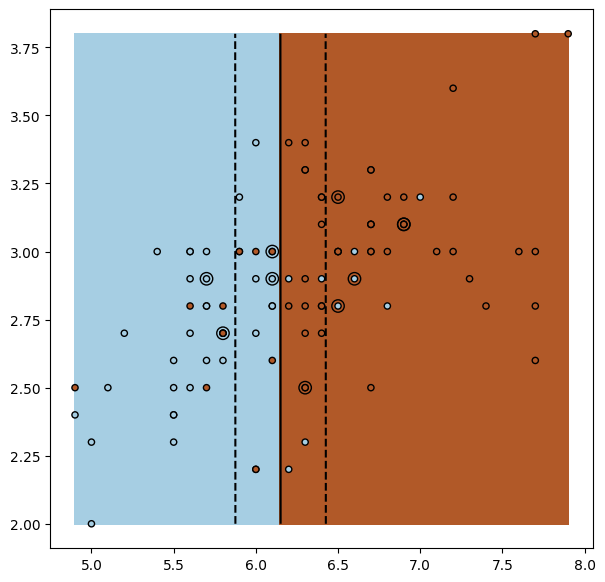

In [10]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc)

## Poly Kernel

다음으로 알아볼 커널은 poly 커널 입니다.  
poly커널은 직선을 곡선으로 mapping 시켜주는 커널입니다.  
poly커널에 영향을 미치는 argument들은 다음과 같습니다.
- gamma
    - 결경 경계를 스케일링해주는 값입니다.
- degree
    - 몇 차원의 곡선으로 맵핑할지 정해주는 값입니다.

In [12]:
# scaling
poly_svc = SVC(kernel="poly")
poly_svc.fit(train_data, train_target)

SVC(kernel='poly')

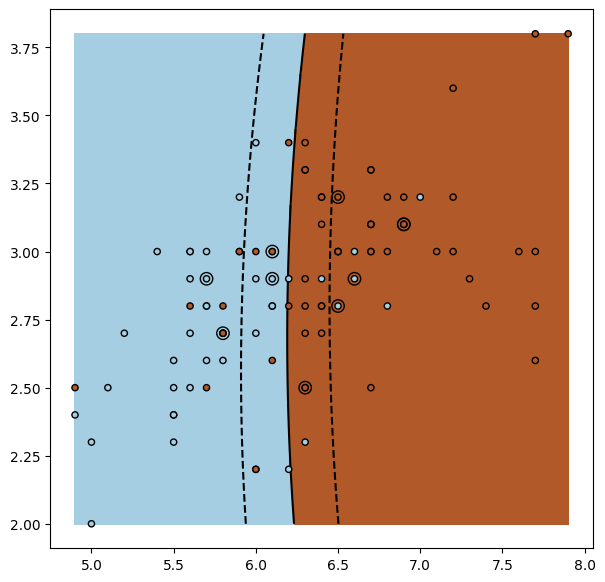

In [13]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [15]:
# gamma=0.1
poly_svc = SVC(kernel="poly", gamma=0.1)
poly_svc.fit(train_data, train_target)

SVC(gamma=0.1, kernel='poly')

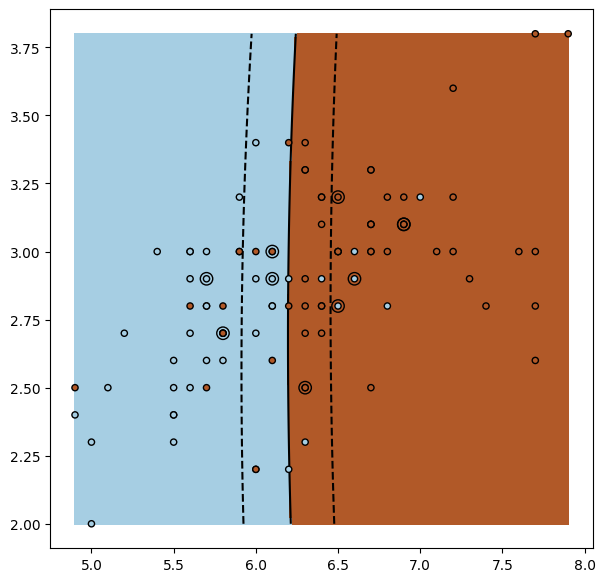

In [16]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

In [17]:
# gamma=10 감마값을 크게 준다
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

SVC(gamma=10, kernel='poly')

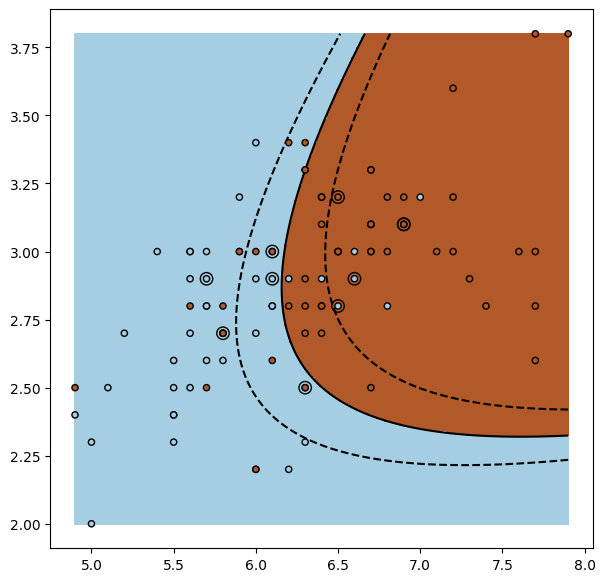

In [19]:
# degree=2

poly_svc = SVC(kernel="poly", gamma=10, degree=2)
poly_svc.fit(train_data, train_target)

plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

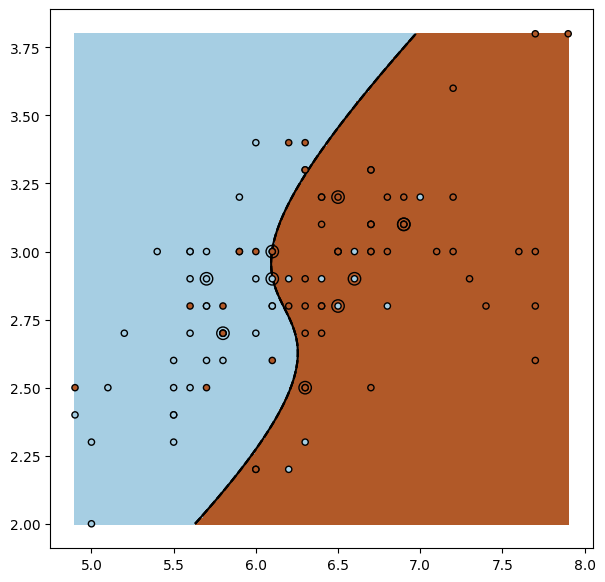

In [20]:
# degree = 4
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)

plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

## RBF Kernal

rbf 커널은 데이터를 고차원의 공간으로 mapping을 시켜줌


rbf또한 gamma 값으로 scaling을 함

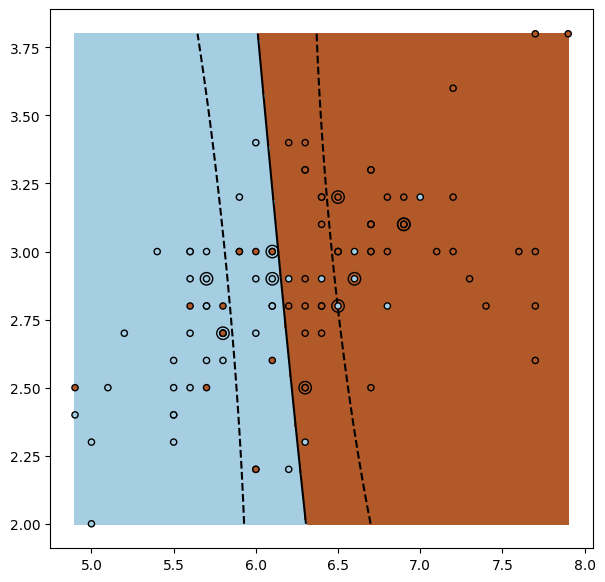

In [21]:
# scale

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)

plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)


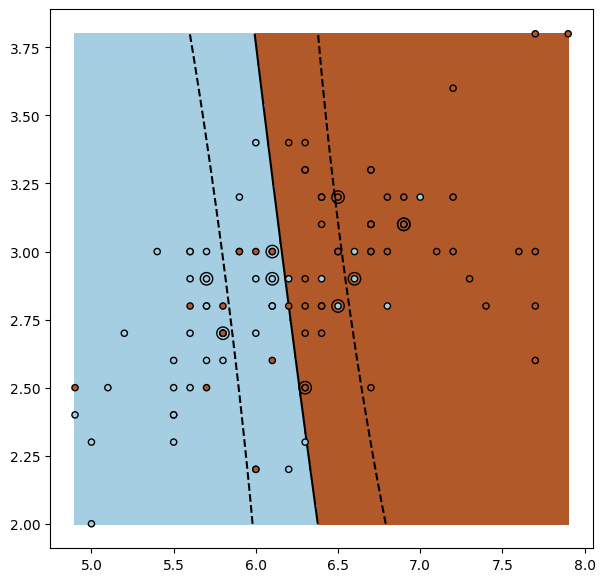

In [23]:
# gamma=0.1
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)

plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

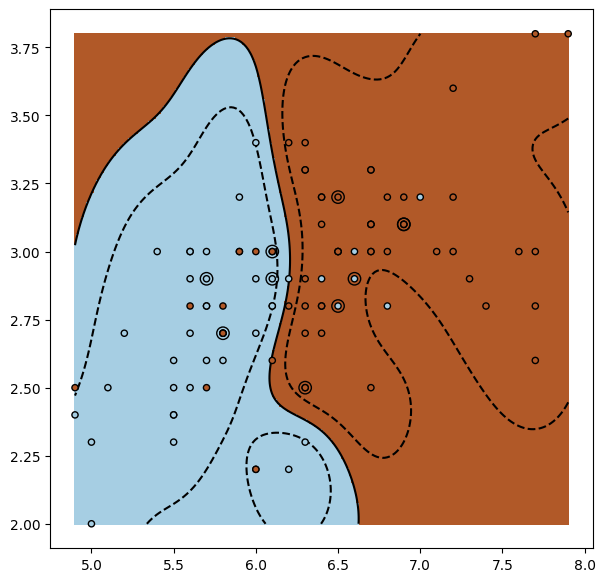

In [24]:
# gamma=10
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

## Penalty

In [25]:
# poly
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)

hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)

SVC(C=100, gamma=10, kernel='poly')

Text(0.5, 1.0, 'Hard penalty')

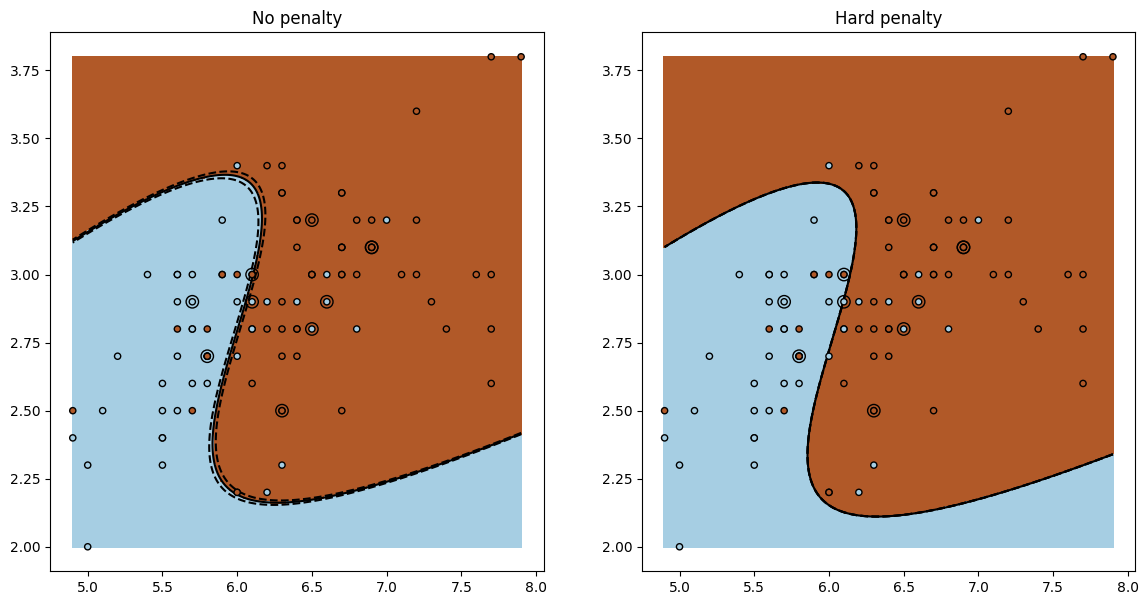

In [26]:
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(poly_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard penalty")

Text(0.5, 1.0, 'Hard penalty')

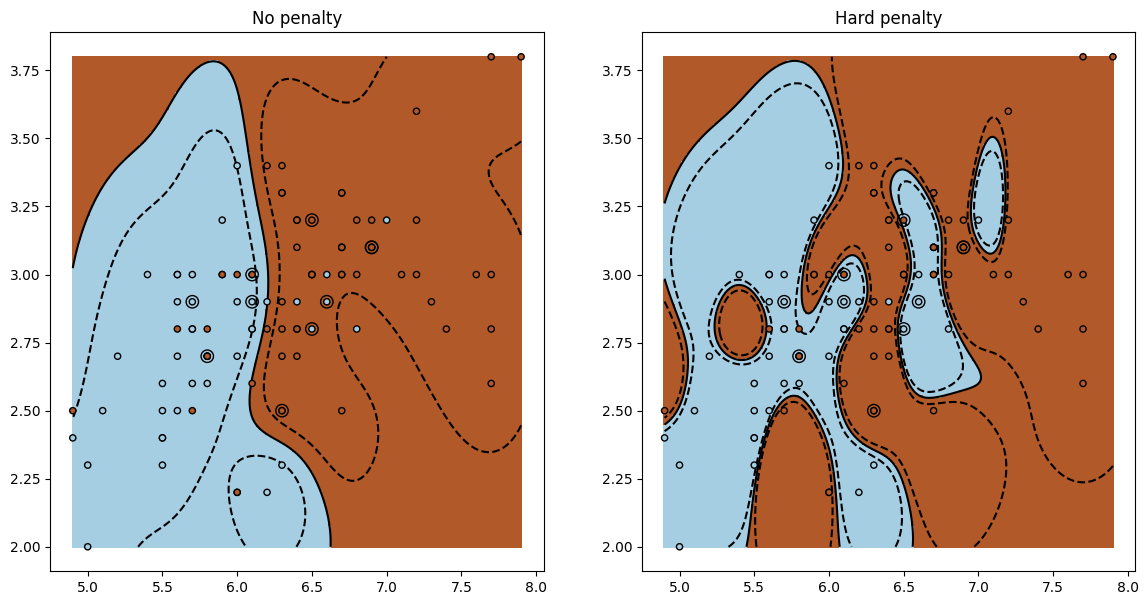

In [27]:
# RBF
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)

hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)

plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(rbf_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard penalty")

# 얼굴사진 분류

In [28]:
# setting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [29]:
# data

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [30]:
data, target = faces["data"], faces["target"]

In [31]:
# data EDA

n_samples, h, w = faces.images.shape

n_samples, h, w

In [32]:
# 얼굴의 이름 확인

target_names = faces.target_names
n_classes = target_names.shape[0]

target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

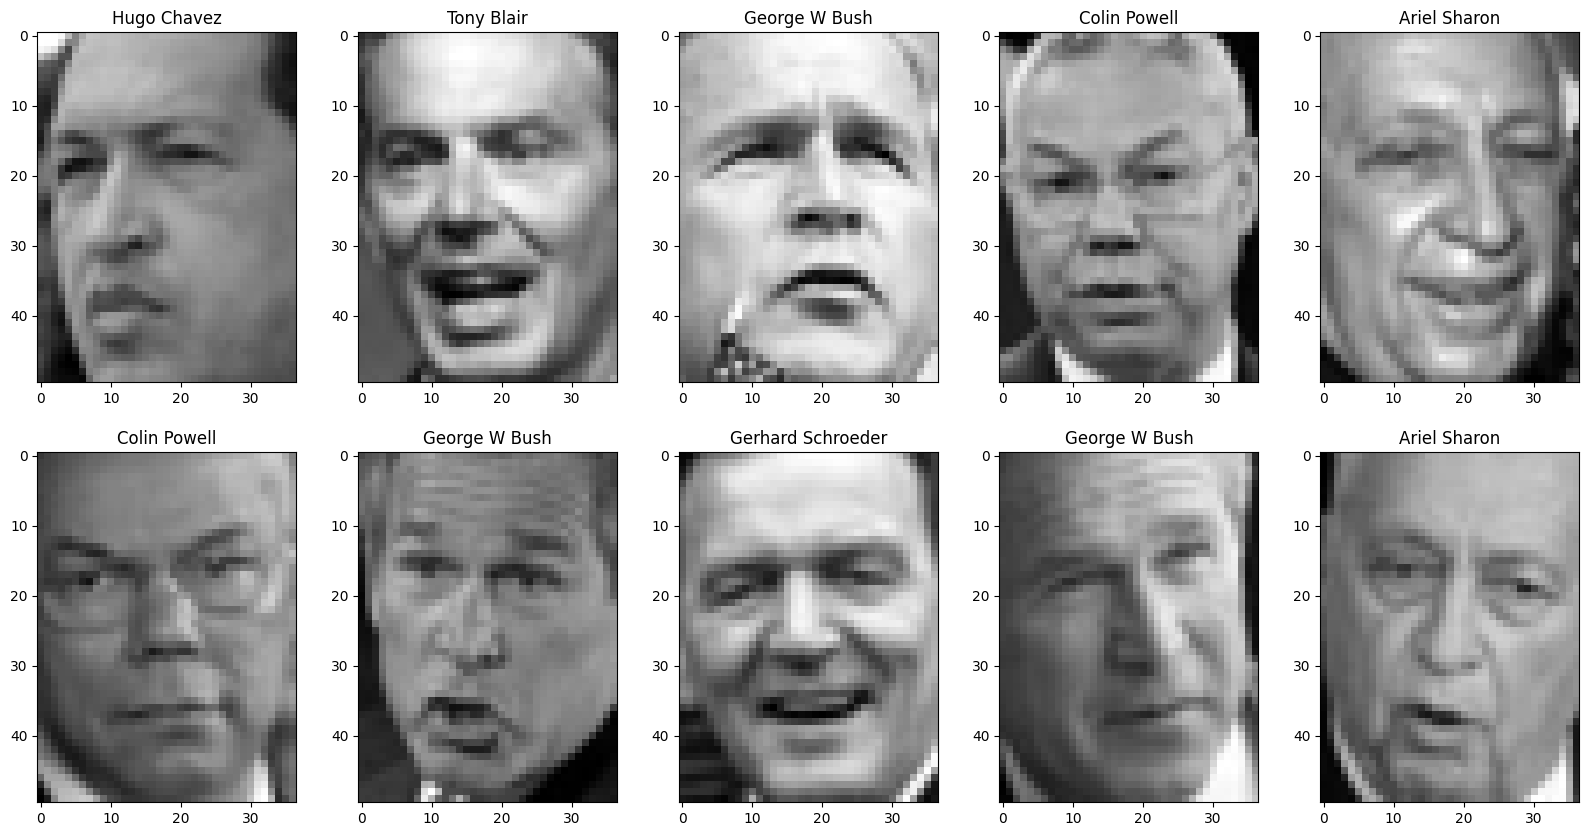

In [33]:
# 이미지 확인
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

In [34]:
# data split

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


In [35]:
# data scaling
# SVM 거리를 기반으로 모델을 학습하기 때문에 데이터의 범위를 줄이기

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_data)

StandardScaler()

In [36]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [37]:
# SVM - baseline
from sklearn.svm import SVC

svm = SVC()

svm.fit(scaled_train_data, train_target)

SVC()

In [38]:
train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

In [39]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9501
test accuracy is 0.7209


In [40]:
# Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

In [41]:
# 탐색범위설정

params = [
    {"kernel": ["linear"], "C": [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
    {
        "kernel": ["rbf"],
        "C": [1, 3, 10, 30, 100, 300, 1000],
        "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
    },
]

params

[{'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000]},
 {'kernel': ['rbf'],
  'C': [1, 3, 10, 30, 100, 300, 1000],
  'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

In [42]:
# 탐색
grid_cv = GridSearchCV(svm, params, cv=3, n_jobs=-1)
grid_cv.fit(scaled_train_data, train_target)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 30000],
                          'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300, 1000],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [43]:
# 결과
print(f"Best score of paramter search is: {grid_cv.best_score_:.4f}")

Best score of paramter search is: 0.8080


In [44]:
print("Best parameter of best score is")
for key, value in grid_cv.best_params_.items():
    print(f"\t {key}: {value}")

Best parameter of best score is
	 C: 10
	 kernel: linear


In [45]:
train_pred = grid_cv.best_estimator_.predict(scaled_train_data)
test_pred = grid_cv.best_estimator_.predict(scaled_test_data)

In [46]:
best_train_acc = accuracy_score(train_target, train_pred)
best_test_acc = accuracy_score(test_target, test_pred)

In [47]:
print(f"Best Parameter train accuracy is {best_train_acc:.4f}")
print(f"Best Parameter test accuracy is {best_test_acc:.4f}")

Best Parameter train accuracy is 1.0000
Best Parameter test accuracy is 0.8682


In [48]:
# final
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Best Parameter test accuracy is {best_test_acc:.4f}")

Baseline test accuracy is 0.7209
Best Parameter test accuracy is 0.8682
